In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
#import os
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# 5.2.4 Explore the Data in Pandas
# "Often ...given more than one CSV file to work with (you'll) be asked to merge them to perform the analysis.
#  Before you merge them, ... explore the data."

# Inspect the City Data DataFrame
# For the `city_data_df` DataFrame, we need to:
#   1. Get all the rows that contain null values.
#   2. Make sure the driver_count column has an integer data type.
#   3. Find out how many data points there are for each type of city.

# First, step (1)...
# [ Recall that we can use the `df.count()` method.
#   Another option is to use `df.isnull().sum()` method chaining. ]
# "We'll use the `df.count()` method to find the names of our columns and the number of rows that are not null."

# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# ... "to make sure there are no null values, we can type and run the following code:"

# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Next, step (2)...
# ... "to see if the driver_count column has a numerical data type because we plan to perform mathematical
# calculations on that column" ...
# [ Recall that to get the data types of each column, use `dtypes` attribute on the DataFrame. ]

# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Finally, step (3)...
# ... "to see how many data points there are for each type of city. ... we'll use the `sum()` method
# on the `city_data_df` for the type column where the condition equals each city in the DataFrame" ...

# [ "Recall that we can use the `unique() method on a specific column, which will return an array, or list, of all
#   the unique values of that column" ]

# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# "Now we can use the `sum()` method on the `city_data_df` DataFrame for the type column where the condition equals either
# Urban, Suburban, or Rural. ...

# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Inspect the Ride Data DataFrame
# For the `ride_data_df` DataFrame, we need to:
#   1. Get all the rows that contain null values.
#   2. Make sure the fare and ride_id columns are numerical data types.

# First, ... "get all the rows that are not null" ...

# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Next, ... "determine if the fare and ride_id columns are numerical data types so that we can perform mathematical
# calculations on those columns."

# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# so, "(b)oth of the DataFrames look good and can now be merged."

# Merge DataFrames
# "Before we merge the DataFrames, let's review each DataFrame."
# The columns in the `city_data_df` DataFrame are:
#   - city
#   - driver_count
#   - type
# The columns in the `ride_data_df` Data frame are:
#   - city
#   - date
#   - fare
#   - ride_id

# [ Recall, "(w)hen we merge two DataFrames, we merge on a column with the same data, and the same column name, in
#   both DataFrames.  We use the following syntax to do that:"
#   `new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])`
#   We may have to merge the DataFrames using the `how=` parameter either left, right, inner, or outer depending (on)
#   how we want to merge the DataFrames. The default is inner." ]

# "Looking at the columns in the two DataFrames, we can see that the column the DataFrames have in common is `city`.
# Therefore, we will merge the two DataFrames on the `city` column, and then add the `city_data_df` to the end of the
# `ride_data_df` DataFrame with the constraint `how="left"`.

# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# 5.3.1 - Create DataFrames for Each Type of City

# "Completing the (bubble chart creation) steps will be more efficient if we create separate DataFrames for each type and then
# create Data Series for each step. .. Let's create three separate DataFrames, one for each type of city. .. Each new DataFrame
# can be created by filtering the `pyber_daat_df DataFrame where the city type is equal to Urban, Suburban, or Rural."

# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
# 5.3.2 - Get the Number of Rides for Each City Type

# [ Recall that "(t)o create a Data Series with one of the columns in a DataFrame, we can use the `groupby()` function and
#   add the column inside the parentheses. ... the `groupby()` function can be used to group large amounts of data when we want
#   to compute mathematical operations on these groups." ]

# "We'll use the `groupby()` function to create a Series of data that has the name of the city as the index, apply the `count()`
# method to the Series for each city, and select the ride_id column."

# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# "We now have one of the three datasets we need to create a bubble chart. Next, we'll use the `groupby()` function on the city
# type DataFrames to get the average fare for each city type. This will be our second dataset." ...

In [20]:
# 5.3.3 - Get the Average Fare for Each City Type

# "Using the separate DataFrames for each city type, we can calculate the average fare for each city in the urban, suburban, and
# rural cities. .. Using the `groupby()` function, we can chain the `mean()` method to get the averages of the fare column."

# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# "Now we have two of three datasets we need to create a bubble chart. Next, we'll use the `groupby()` function on the city type
# DataFrames to get the average number of drivers for each city type. This will be our third and final dataset." ...

In [22]:
# 5.3.4 - Get the Average Number of Drivers for Each City Type

# "To get the average number of drivers for each city in the urban, suburban, and rural cities, we can use the `groupby()`
# function and get the `mean()` of the `driver_count` column."

# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# "Now we have all our data and can begin to create our bubble chart!"

# nb "With the number of rides and the average fare for each city type, you can create a simple scatter, but Omar said that V.
# Isualize wants to see how the rides and fare stack are affected by the average number of drivers for each city type.  This
# will help V. Isualize make key decisions about where resources and support are needed."

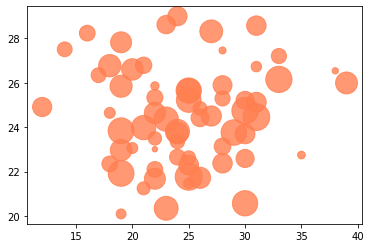

In [24]:
# 5.3.5 - Create Bubble Charts

# ... "use the company's color scheme for each type of city. ... gold for profitability, sky blue for strategy, and coral (b/c
# V. Isualize loves the ocean) ... You can use each color for a city type."

# ... "create each scatter plot individually and add them all to one chart"

# "We'll create our plots using the MATLAB method."

# -- Create the Urban Cities Bubble Chart

# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, color="coral", s=urban_driver_count * 10,
            alpha=0.8, label="Urban")

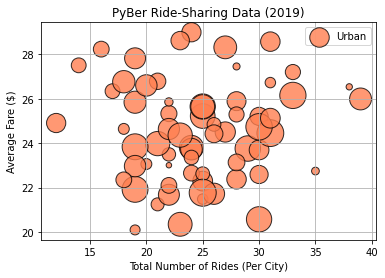

In [25]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="k", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

# "The chart in the output cell will have coral markers that vary in diameter based on the average number of drivers in each
# city, a title, and axes labels."


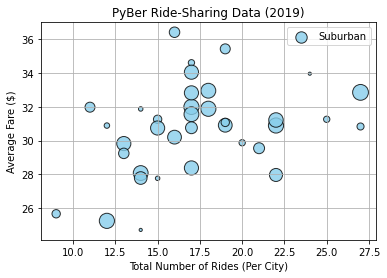

In [26]:
# -- Create the Suburban Cities Bubble Chart

# ... "create the same bubble chart as ... for the urban cities chart but change the color to sky blue." ...

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="k", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

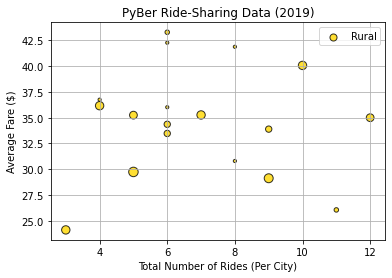

In [27]:
# -- Create the Rural Cities Bubble Chart

# ... "we will change the color of the circle to gold."

# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="k", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

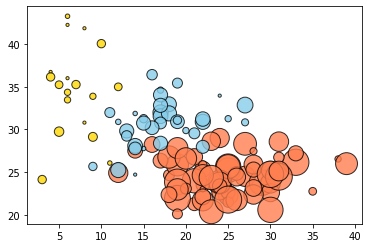

In [28]:
# "Next, we will combine these three charts into one chart." ...

# 5.3.6 - Create a Bubble Chart for All Cities

# ... "instead of showing each bubble chart separately, ... show one bubble chart that has all the city types. Given that the
# different city types have different colors, this will ... stand out and show how each city type compares with one another."

# "To creaete a bubble chart that showcases all the different city types in one chart, ... combine our three scatter plot code
# blocks in one Jupyter Notebook cell."

# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

# Show the plot
plt.show()

# ... and "behold the (beautiful!) chart created":
# "A scatter plot for all cities (with) a bubble size based on the driver count for each city, a circle marker with different
# colors based on the type of city with 20% transparency."

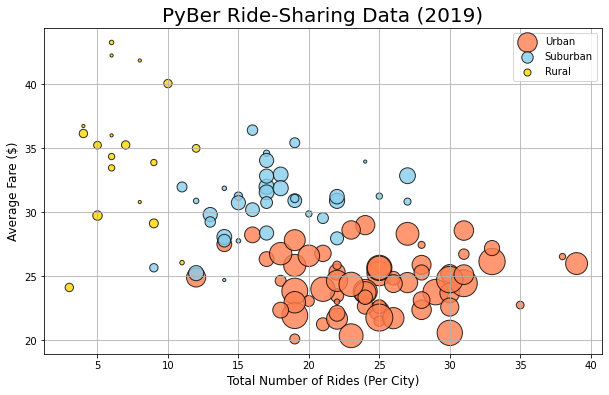

In [29]:
# ... "add a title, labels for the axes, a legend, and a grid for all three charts and increase the font size of the axes labels
# to 12 and the title to 20. ... also enlarge the figure so the markers are more spread out." ...

# Build the scatter charts for each city type.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()

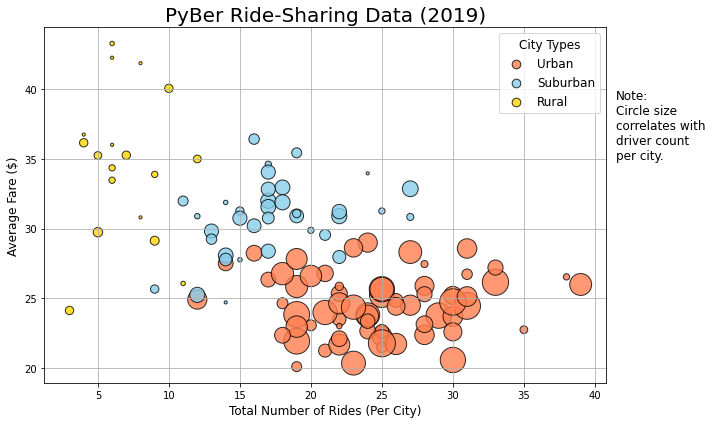

In [30]:
# nb "notice ... (t)he markers in the legend have different sizes, which are automatically determined based on the average size
#     of the marker. Therefore, ... need to customize the legend to sccale them to the same size. .. We can declare a variable
#     for the legend function, `lgnd = plt.legend()`, and add parameters for font size, legend location, and legend title, along
#     with some other features. After we declare the variable for the legend, we can use `legendHandles[]._sizes` to set the
#     font size of the marker in the legend to a fixed size. Inside the brackets, we can add the list element for the number of
#     markers in the legend." We'll be replacing the `plt.legend()` code (from cell above) to do as follows:
#     /1/ make the font size for the text "small"
#     /2/ expand the legend horizontally to fit the area (nb this is optional since the font size is small)
#     /3/ add number=1 scatter points for each marker in the legend.(nb can add multiple marker points by increasing the number)
#     /4/ locate the legend where it will "best" filt based on the plotting of the data points.
#     /5/ add a legend title
#     /6/ set each marker in the legend equal to 75-point font
#     /7/ increase the font size of the legend title to 12.

# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Complete the legend modifications as noted above...
# Create a legend
lgnd = plt.legend(fontsize="12",       # /1/
                  mode="Expanded",     # /2/
                  scatterpoints=1,     # /3/
                  loc="best",          # /4/
                  title="City Types")  # /5/
lgnd.legendHandles[0]._sizes = [75]  # /6/[0] is index for list element in the legend (reference one of the three scatter plots)
lgnd.legendHandles[1]._sizes = [75]  # .. [1]
lgnd.legendHandles[2]._sizes = [75]  # .. [2]
lgnd.get_title().set_fontsize(12)  # /7/

# next, add note to the right of the chart that the circle size correlates with the driver count for each city; inside the
# `plt.text()` function, along with the text in quotes, are the x and y coordinates for the chart.
# Incorporate a text label about circle size.
plt.text(41.5, 35, "Note:\nCircle size\ncorrelates with\ndriver count\nper city.", fontsize="12")

#
# finally, save the chart in a folder, providing a direct path to the folder and filename of the saved image.

# Save the figure, using tip given in class to ensure full text prints to saved figure.
plt.tight_layout()
plt.savefig("analysis/Fig1.png")

# Note: the link below posted to "Kimberly Fessel" youtube channel
#  From youtube video tip "How to save a matplotlib figure and fix text cutting off || Matplotlib Tips" ... video link:
#     https://www.youtube.com/watch?v=C8MT-A7Mvk4
#  ...received argument options bbox_inches="tight" and dpi=200 settings to correct for legend text outside figure being cut off
##plt.savefig("analysis/Fig1.png", bbox_inches="tight", dpi=200)

# Show the plot.
plt.show()


In [31]:
# 5.4.1 Summary Statistics for Number of Rides by City Type

# "We'll use and compare the following three ways to calculate the summary statistics:
#  - The Pandas `describe()` function on the DataFrame or Series.
#  - The Pandas `mean()`, `median()`, and `mode()` methods on a Series.
#  - The NumPy `mean()` and `median()` functions, and the SciPy stats `mode()` function on a Series."

# First let's use the `describe()` function on the urban, suburban, and rural Data Frames.
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [118]:
# Skill Drill
# Use the `describe()` function on the `suburban_cities_df` and `rural_cities_df` DataFrames and compare the outputs of all
# three DataFrames.

pandas_describe_urban = urban_cities_df.describe()
pandas_describe_suburban = suburban_cities_df.describe()
pandas_describe_rural = rural_cities_df.describe()

pandas_describe_all_city_types_df = pd.DataFrame(
        {"Urban fare": pandas_describe_urban["fare"],
         "Urban ride_id": pandas_describe_urban["ride_id"],
         "Urban driver_count": pandas_describe_urban["driver_count"],
         "Suburban fare": pandas_describe_suburban["fare"],
         "Suburban ride_id": pandas_describe_suburban["ride_id"],
         "Suburban driver_count": pandas_describe_suburban["driver_count"],
         "Rural fare": pandas_describe_rural["fare"],
         "Rural ride_id": pandas_describe_rural["ride_id"],
         "Rural driver_count": pandas_describe_rural["driver_count"]})
    
pandas_describe_all_city_types_df
#pandas_describe_urban["fare"]
#urban_cities_df.describe()

,Urban fare,Urban ride_id,Urban driver_count,Suburban fare,Suburban ride_id,Suburban driver_count,Rural fare,Rural ride_id,Rural driver_count
count,1625.000000,1.625000e+03,1625.000000,625.000000,6.250000e+02,625.000000,125.000000,1.250000e+02,125.000000
mean,24.525772,4.873485e+12,36.678154,30.970128,4.971015e+12,13.712000,34.623440,4.647746e+12,4.296000
std,11.738649,2.907440e+12,20.075545,10.677508,2.912410e+12,8.042372,14.558046,2.887834e+12,2.691156
min,4.050000,1.458810e+10,3.000000,12.050000,3.218337e+08,1.000000,10.110000,2.684873e+10,1.000000
25%,14.550000,2.400244e+12,22.000000,21.970000,2.364253e+12,5.000000,19.900000,2.275364e+12,1.000000
50%,24.640000,4.711188e+12,37.000000,30.750000,5.053221e+12,16.000000,37.050000,4.023962e+12,4.000000
75%,34.580000,7.451579e+12,52.000000,39.830000,7.551674e+12,21.000000,47.070000,7.118047e+12,7.000000
max,44.970000,9.991538e+12,73.000000,49.960000,9.917744e+12,25.000000,58.550000,9.990581e+12,9.000000


In [119]:
# ..."calculate the summary statistics of the ride count for each city type"

# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [120]:
# Get suburban ride_count summary statistics (with Pandas `describe()`)
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [121]:
# Get rural ride_count summary statistics (with Pandas `describe()`)
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [122]:
# Next, "(i)f we want to get only the mean without getting the complete summary statistics, we can use the `mean()` method.

# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [123]:
# "Notice that the mean of the ride count for each city type using the `mean()` method is the same value that was returned using
# the `describe()` function."
#
# FINDING: "If we compare the average number of rides between each city type, we'll notice that the average number of rides in
#          the rural cities is about 3.5 and 2.5 times lower than urban and suburban cities, respectively."

# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [124]:
# Notice that the median of the ride count for each city type using the `median()` method is the same value that was returned
# using the `describe()` function.
#
# FINDING: If we compare the median number of rides between each city type, we'll notice that the median number of rides in
#          the rural cities is 4 (about 2.83) times lower than that in urban (suburban) cities.

# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [125]:
# Recall that "(a) dataset like this Series can have any number of modes--or even no mode!"

# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [126]:
# Calculate the mode of the ride count for the rural cities.
rural_ride_count.mode()

0    6
dtype: int64

In [127]:
# -- NumPy mean() and median() Functions and SciPy mode() Function

# "An optional approach to calculating the mean, median, and mode of a DataFrame or Series is to use the NumPy and SciPy
# statistics modules. We introduce these methods because there might come a time when you're working in the Python interpreter
# or VS Code environment instead of the Jupyter Notebook environment. .. Whether you .. use the Python interpreter, VS Code, or
# Jupyter Notebook environment, we will need to import the NumPy and SciPy statistics modules. Add the following import
# statements to ...(this) file and run the cell."

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [129]:
# "Let's calculate the mean, median, and mode--otherwise known as the **measures of central tendency** for the ride counts--and
# print out those measures."

# First, for the urban cities ...

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [130]:
# Let's go over what the output for the urban measures of central tendency ^^^^^ gives us:
#  - the mean and median values that were returned are the same values that were returned using the `describe()` function and
#     the `mean()` and `median()` methods, respectively.
#  - With SciPy statistics, the mode result that's returned is the mode that appears the most frequently.
#   - `ModeResult` returned two attributes:
#     o the first attribute, `mode`, is 22; o The second attribute, `count`, is the number of times it occurs in the dataset, in
#       this case, 7.
# So, unlike the Pandas `mode()` method, the `sts.mode()` method will return the number of times the mode appears in the dataset.

# Next, for the suburban cities ...

# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [131]:
# Now, for the rural cities ...

# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [132]:
# 5.4.2 Summary Statistics for the Fare by City Type

# ..."summary statistics for the average fares for each city type...will help...determine which city types are generating the
# most money...definitely want to know that!"

# "In order to get the summary statistics for the average fare for each city type, ...need to get the data from the "fare"
# column in each city type DataFrame.

# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [134]:
# now, "can calculate the mean, median, and mode for the `urban_fares` Series. To get the mean and median, ...use the NumPy mean
# and median functions; to get the mode, ...use the SciPy statistics mode function, `sts.mode()`. (using this mode function
# returns how many times the mode appears in the dataset)."

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [136]:
# next, for the suburban cities...

# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [137]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [138]:
# now, for the rural cities...

# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [139]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [150]:
# 5.4.3 Summary Statistics for the Number of Drivers by City Type

# with statistics for the revenue by city type, "you think it would be a good idea to get the summary statistics for the number
# of drivers by city type ...to be well prepared to answer any question in your presentation. ... this data...will allow V.
# Isualize and other stakeholders to know which cities need more driver support."

# Q: To perform summary statistics on the number of drivers by city type, what column would you use to create a Series from each
#    city type DataFrame?
#    (city) (ride_count) (driver_count) (ride_id)
# A: driver_count

# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [170]:
# Skill Drill
# Calculate the mean, median, and mode for the urban, suburban, and rural number of drivers Series using NumPy and SciPy
# statistics module(s).

# now, "can calculate the mean, median, and mode for the `urban_drivers` Series. To get the mean and median, ...use the NumPy
# mean and median functions; to get the mode, ...use the SciPy statistics mode function, `sts.mode()`. (using this mode function
# returns how many times the mode appears in the dataset)."

# Calculate the measures of central tendency for the average number of drivers for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban cities is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban cities is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban cities is {mode_urban_drivers}.")


The mean number of drivers for urban cities is 37.
The median number of drivers for urban cities is 37.0.
The mode number of drivers for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [152]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [169]:
# Next, calculate the mean, median, and mode for the `suburban_drivers` Series.
# ...and to get the mean and median, ...use the NumP mean and median functions; to get the mode, ...use the SciPy statistics
# mode function, `sts.mode()`. (using this mode function returns how many times the mode appears in the dataset)."

# Calculate the measures of central tendency for the average number of drivers for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban cities is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban cities is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban cities is {mode_suburban_drivers}.")


The mean number of drivers for suburban cities is 14.
The median number of drivers for suburban cities is 16.0.
The mode number of drivers for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [154]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [171]:
# now, "can calculate the mean, median, and mode for the `rural_drivers` Series. To get the mean and median, ...use the NumPy
# mean and median functions; to get the mode, ...use the SciPy statistics mode function, `sts.mode()`. (using this mode function
# returns how many times the mode appears in the dataset)."

# Calculate the measures of central tendency for the average number of drivers for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural cities is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural cities is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural cities is {mode_rural_drivers}.")

The mean number of drivers for rural cities is 4.
The median number of drivers for rural cities is 4.0.
The mode number of drivers for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


In [156]:
# Q: After calculating the mean number of drivers for each city, what is the average number of drivers for the suburban cities?
#    (37) (14) (4)
# A: 14

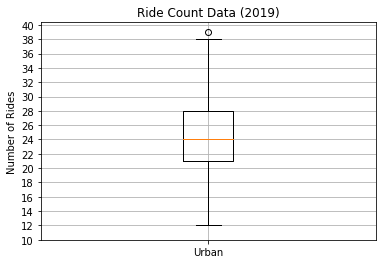

In [172]:
# 5.4.4 Create Box-and-Whisker Plots

# "visualize the summary statistics and determine if there are any outliers by using box-and-whisker plots"

# recall: "Box-and-whisker plots are an effective way to show a lot of information about distribution in a small amount of space,
#         especially outliers."

# -- Box-and-Whisker Plots for Ride Count Data

# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fix, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

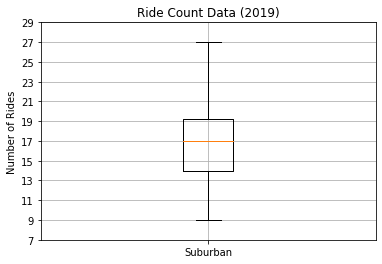

In [173]:
# Skill Drill
# Calculate the summary statistics with box-and-whisker plots on the number of suburban and rural rides.

# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fix, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(7, 30, step=2.0))
ax.grid()
plt.show()

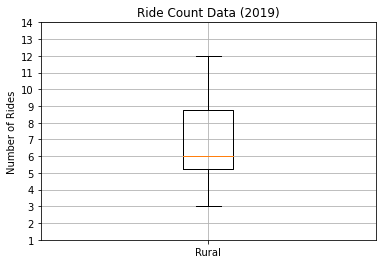

In [174]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fix, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(1, 15, step=1.0))
ax.grid()
plt.show()

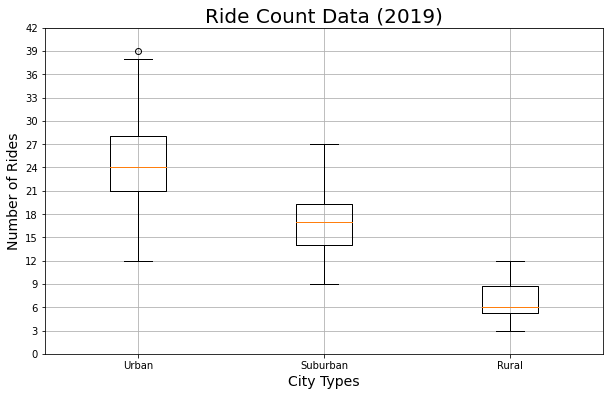

In [175]:
# "To show all the city type box-and-whisker plots on one chart we need to modify the `boxplot()` function and add other
# features. We will increase the size of the chart and the font of the title and axes labels.

# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fix,ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
#Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [176]:
# FINDING: "There is one outlier in the urban ride count data. Also, the average number of rides in the rural cities is about
#          4- and x3.5x (2.83-) times lower per city than in the urban (suburban) cities."

# looking over the plot, we are able to see the result for one of our tasks -- find out if there are any outliers. "We know (now)
# that the outlier for the `urban_ride_count` is 39. From this information, we can find out which city has the highest rider
# count."

# REWIND: "Recall that the `urban_ride_count` is a Series with the index of the city and the data the number of rides for each
#         city. We can get all the 'True' values where the `urban_ride_count` equals 39. Then, we can filter the `urban_ride_count`
#         Series for all the 'True' values and get the city name from the index, like this:" ...

# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

# result is that `West Angela has the highest rider count.`

West Angela has the highest rider count.


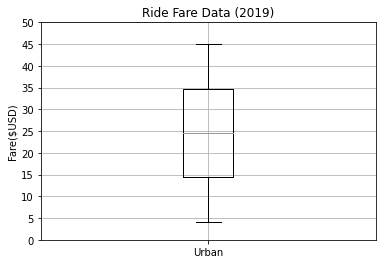

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [177]:
# -- Box-and-Whisker Plots for Ride Fare Data

# "Next, let's create box-and-whisker plots for the ride fare data with summary statistics. .. For the fare data, we will use the
# `urban_fares` Series we created earlier." ...

# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

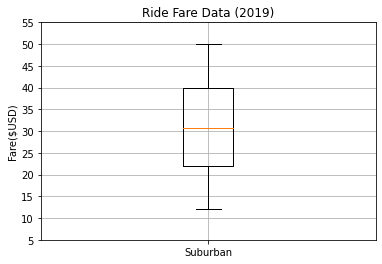

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [180]:
# Skill Drill
# Create box-and-whisker plots for the `suburban_fares` and the `rural_fares` with summary statistics.

# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(5, 56, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

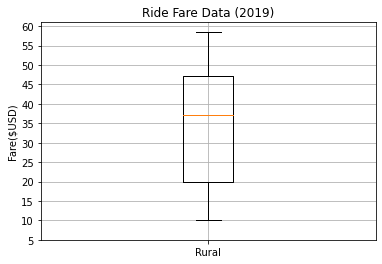

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [182]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(5, 61, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

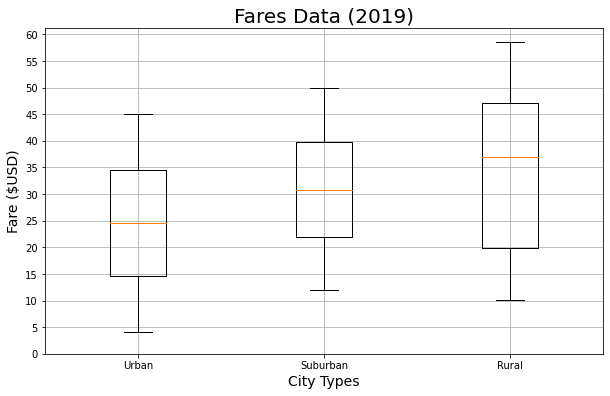

In [184]:
# Skill Drill
# Create a box-and-whisker plot that has all three city types' fare data in one plot that looks similar to the following image.
# Save the combined box-and-whisker plot as `Fig3.png` to your "analysis" folder.

# "To show all the city type box-and-whisker plots on one chart we need to modify the `boxplot()` function and add other
# features. We will increase the size of the chart and the font of the title and axes labels.

# Add all fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fix,ax = plt.subplots(figsize=(10, 6))
ax.set_title("Fares Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(fares_data, labels=x_labels)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
#Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

In [ ]:
# FINDING: "From the combined box-and-whisker plots, we see that there are no outliers. However, the average fare for rides in
#          the rural cities is about $11 and $5 more per ride than the urban and suburban cities, respectively."
# Qs: Why do you think there is such a big difference?
#     By looking at the number of riders for each city, can you get a sense of the overall revenue?



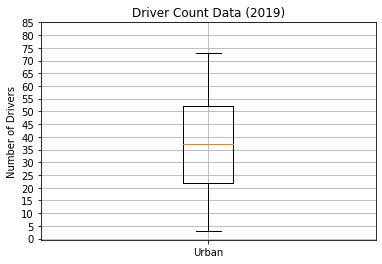

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [186]:
# -- Box-and-Whisker Plots for Driver Count Data

# one last set of box-and-whisker plots: for the driver count data with summary statistics.

# "For the driver count data, we'll use the `urban_drivers` Series we created earlier." ...

# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fix, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

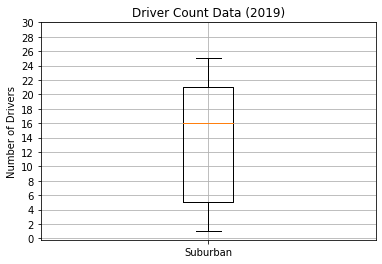

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [190]:
# Skill Drill
# Using the code for the box-and-whisker plots for the urban drivers, create box-and-whisker plots for the `suburban_drivers` and
# the `rural_drivers` Series with summary statistics.

# "For the driver count data, we'll use the `suburban_drivers` Series we created earlier." ...

# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fix, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 31, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

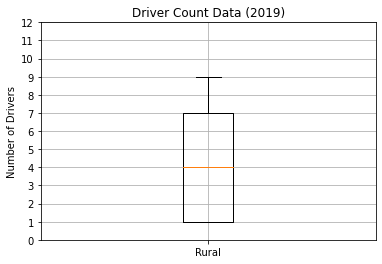

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [194]:
# "For the driver count data, we'll use the `rural_drivers` Series we created earlier." ...

# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fix, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 13, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

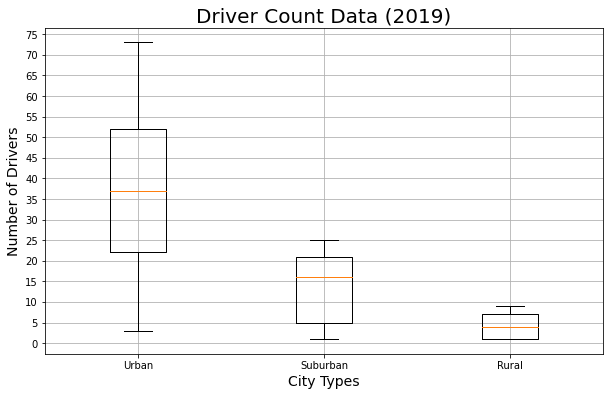

In [196]:
# Skill Drill
# Create a box-and-whisker plot that has all three city types' driver count data in one box-and-whisker plot that looks similar
# to the following image. Save this combined box-and-whisker plot as `Fig4.png` in your "analysis" folder.

# "To show all the city type box-and-whisker plots on one chart we need to modify the `boxplot()` function and add other
# features. We will increase the size of the chart and the font of the title and axes labels.

# Add all driver box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fix,ax = plt.subplots(figsize=(10, 6))
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(drivers_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
#Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [ ]:
# FINDING: "The average number of drdivers in rural cities is nine to four times less per city than in urban and suburban cities,
#          respectively."
# Q: By looking at the driver count data and fare data, can you get a sense of the overall revenue?